In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit, logit, comb
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import os

In [70]:
data_dir = '/mnt/lareaulab/cfbuenabadn/data_sc_regulation/data_autocorrelation/'
chen_mrna_event = pd.read_csv(data_dir + 'chen/mrna_per_event.tab', sep='\t', index_col=0)
chen_rd = pd.read_csv(data_dir + 'chen/rd_pc2.tab', sep='\t', index_col=0)
chen_PSI = pd.read_csv(data_dir + 'chen/skipped_exons_psi.tab', sep='\t', index_col=0)
chen_psix = pd.read_csv('chen.scores.txt', sep='\t', index_col=0)
#chen_pseudotime = pd.read_csv('~/data_sc_regulation/chen/pseudotime.tab', sep='\t', index_col=0)

In [71]:
random_df = pd.DataFrame()
for mean_var in os.listdir('chen_pvals'):
    with open('chen_pvals/' + mean_var) as fh:
        random_scores = [np.float(x.rstrip()) for x in fh.readlines()]
    mean_var = mean_var.split('.')[0]
    random_df[mean_var] = random_scores
    

In [90]:
chen_psix.sort_values('L_score')

,bin,L_score,pvals,qvals,norm_pvals,norm_qvals
Msl3_1,mean_1_var_4,-0.249016,0.996004,0.998383,9.996357e-01,NaN
Camsap3_3,mean_1_var_4,-0.245751,0.996004,0.998383,9.995632e-01,NaN
Ttc3_6,mean_1_var_3,-0.221722,0.996004,0.998383,9.985084e-01,NaN
Agbl5_3,mean_1_var_2,-0.214746,0.995005,0.998383,9.998177e-01,NaN
Stap2_1,mean_1_var_4,-0.211986,0.987013,0.992691,9.975150e-01,NaN
...,...,...,...,...,...,...
Sgce_1,mean_2_var_3,0.862339,0.000999,0.006529,1.570623e-91,NaN
Meaf6_2,mean_2_var_2,0.874648,0.000999,0.006529,8.263161e-94,NaN
Apbb1_3,mean_1_var_3,0.985540,0.000999,0.006529,5.571134e-66,NaN
Slc25a25_1,mean_1_var_4,0.993510,0.000999,0.006529,4.344284e-56,NaN


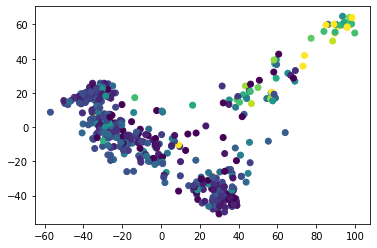

In [47]:
plt.scatter(chen_rd.PC_1, chen_rd.PC_2, c=chen_PSI.loc['Zfp207_1'])

Atp6v0a1_8


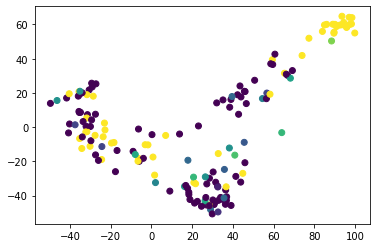

Tpd52_4


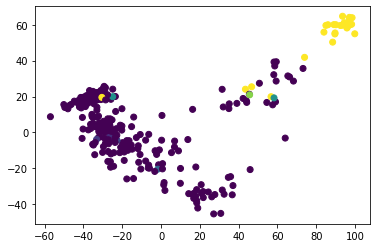

Numa1_3


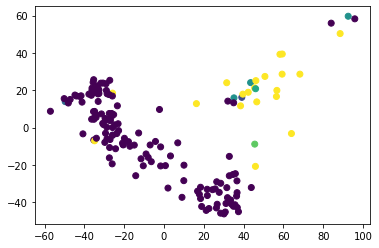

Rpn2_3


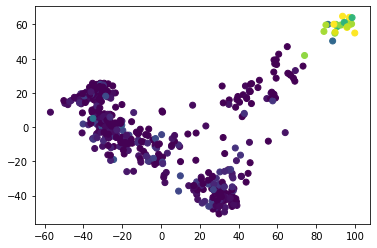

Arvcf_5


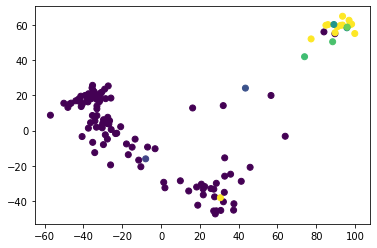

Meaf6_nmdSE_1


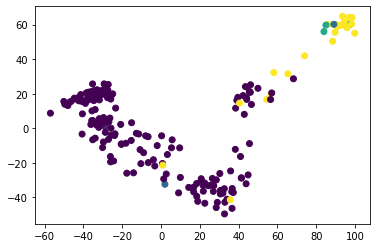

Dock11_2


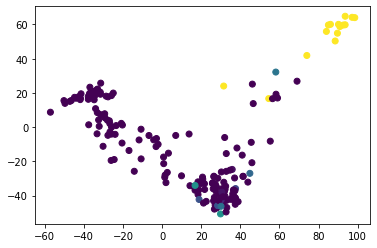

Chchd3_9


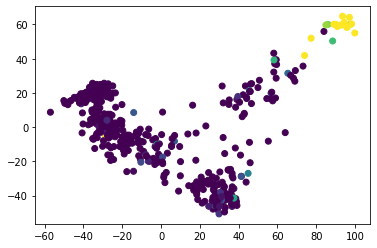

Mta1_5


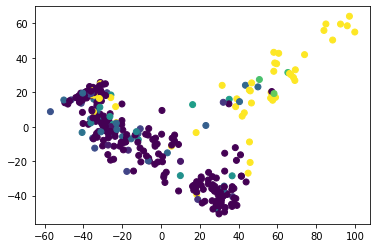

Sgce_1


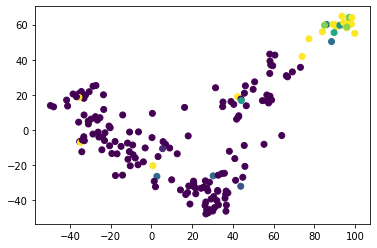

Meaf6_2


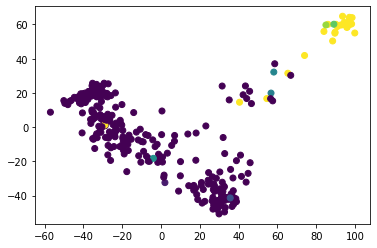

Apbb1_3


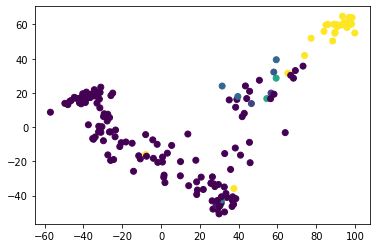

Slc25a25_1


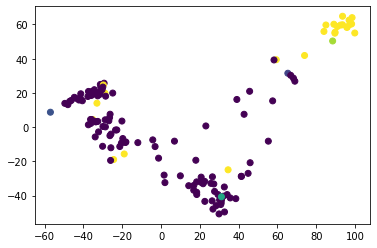

Clta_2


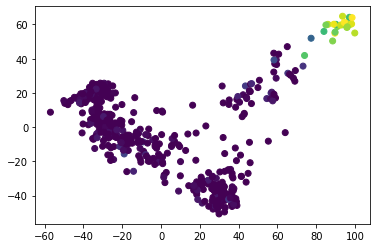

In [24]:
for exon in chen_psix.sort_values('L_score')[-14:].index:
    print(exon)
    plt.scatter(chen_rd.PC_1, chen_rd.PC_2, c=chen_PSI.loc[exon])
    plt.show()

100%|██████████| 2098/2098 [00:10<00:00, 196.61it/s]


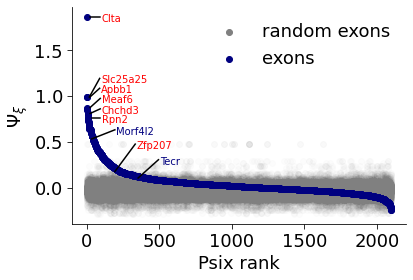

In [89]:
fig = plt.figure()
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons')

for mean_var in tqdm(chen_psix.sort_values('L_score')[::-1].bin):
    subset = np.random.choice(random_df[mean_var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02)
    i += 1


plt.text(100, chen_psix.loc['Clta_2'].L_score-0.05, 'Clta', c='red')   #
plt.plot([20, 90], [chen_psix.loc['Clta_2'].L_score, chen_psix.loc['Clta_2'].L_score],c='black')

plt.text(100, chen_psix.loc['Slc25a25_1'].L_score+0.15, 'Slc25a25', c='red')   #
plt.plot([20, 90], [chen_psix.loc['Slc25a25_1'].L_score, chen_psix.loc['Slc25a25_1'].L_score+0.2],c='black')

plt.text(100, chen_psix.loc['Apbb1_3'].L_score+0.05, 'Apbb1', c='red')   
plt.plot([20, 90], [chen_psix.loc['Apbb1_3'].L_score, chen_psix.loc['Apbb1_3'].L_score+0.1],c='black')

plt.text(104, chen_psix.loc['Meaf6_2'].L_score+0.05, 'Meaf6', c='red')    
plt.plot([24, 94], [chen_psix.loc['Meaf6_2'].L_score, chen_psix.loc['Meaf6_2'].L_score+0.1],c='black')

plt.text(104, chen_psix.loc['Chchd3_9'].L_score, 'Chchd3', c='red')   
plt.plot([25, 94], [chen_psix.loc['Chchd3_9'].L_score, chen_psix.loc['Chchd3_9'].L_score+0.05],c='black')


# plt.text(105, chen_psix.loc['Sgce_1'].L_score-0.1, 'Sgce', c='red')   
# plt.plot([25, 95], [chen_psix.loc['Sgce_1'].L_score, chen_psix.loc['Sgce_1'].L_score-0.05],c='black')



# plt.text(104, chen_psix.loc['Mta1_5'].L_score-0.05, 'Mta1', c='red')    
# plt.plot([24, 94], [chen_psix.loc['Mta1_5'].L_score, chen_psix.loc['Mta1_5'].L_score],c='black')
# plt.text(105, chen_psix.loc['Dst_5'].L_score-0.15, 'Dst', c='red')   
# plt.plot([25, 95], [chen_psix.loc['Dst_5'].L_score, chen_psix.loc['Dst_5'].L_score-0.1],c='black')


# plt.text(104, chen_psix.loc['Cadm1_9'].L_score-0.25, 'Cadm1', c='red')    
# plt.plot([24, 94], [chen_psix.loc['Cadm1_9'].L_score, chen_psix.loc['Cadm1_9'].L_score-0.2],c='black')
plt.text(205, chen_psix.loc['Morf4l2_7'].L_score+0.05, 'Morf4l2', c='navy')   
plt.plot([35, 195], [chen_psix.loc['Morf4l2_7'].L_score, chen_psix.loc['Morf4l2_7'].L_score+0.1],c='black')

plt.text(505, chen_psix.loc['Tecr_6'].L_score+0.15, 'Tecr', c='navy')   
plt.plot([355, 495], [chen_psix.loc['Tecr_6'].L_score, chen_psix.loc['Tecr_6'].L_score+0.2],c='black')

plt.text(105, chen_psix.loc['Rpn2_3'].L_score-0.05, 'Rpn2', c='red')   
plt.plot([35, 95], [chen_psix.loc['Rpn2_3'].L_score, chen_psix.loc['Rpn2_3'].L_score],c='black')



# plt.text(205, chen_psix.loc['Dock11_2'].L_score+0.08, 'Dock11', c='red')   
# plt.plot([55, 195], [chen_psix.loc['Dock11_2'].L_score, chen_psix.loc['Dock11_2'].L_score+0.13],c='black')

plt.text(345, chen_psix.loc['Zfp207_1'].L_score+0.25, 'Zfp207', c='red')   
plt.plot([195, 335], [chen_psix.loc['Zfp207_1'].L_score, chen_psix.loc['Zfp207_1'].L_score+0.3],c='black')




ax.scatter(np.arange(1, len(chen_psix.index)+1), chen_psix.sort_values('L_score')[::-1].L_score, c = 'navy',
          label='exons')
    
plt.xlabel('Psix rank', fontsize=18)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=18, length=5)
# plt.title('Neurogenesis exons', fontsize=18)
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
plt.legend(frameon=False, fontsize=18)

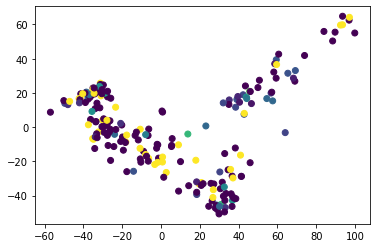

In [91]:
plt.scatter(chen_rd.PC_1, chen_rd.PC_2, c=chen_PSI.loc['Msl3_1'])